# **Analysis of Factors for Predicting Diabetes in Adult Populations**
### **By: Gabriel Diaz de Leon**

## Import Libraries

In [84]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter(action='ignore')

## Import datasets

In [85]:
bin_df = pd.read_csv('diabetes/diabetes_binary_health_indicators_BRFSS2015.csv')
tri_df = pd.read_csv('diabetes/diabetes_012_health_indicators_BRFSS2015.csv')

bin_df.rename({'Diabetes_binary': 'y'}, axis = 1, inplace=True)
tri_df.rename({'Diabetes_012': 'y'}, axis = 1, inplace=True)

bin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   y                     253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Cursory Analysis of Factors

In [86]:
# Using plotly.express to scan factors using distributions, identify factors with unbalanced classes
px.histogram(bin_df['DiffWalk'])

**Factors with unbalanced classes**
- CholCheck
- Stroke
- HeartDiseaseorAttack
- PhysActivity
- Veggies
- HvyAlcoholConsump
- AnyHealthcare
- NoDocbcCost
- MentHlth
- PhysHlth
- DiffWalk
- Education
- Income


## Data Visualizations
Here we will begin by visualizing the different factors as distributions based on semantic groupings

[Text(0.5, 0, 'Heavy Alcohol Consumption')]

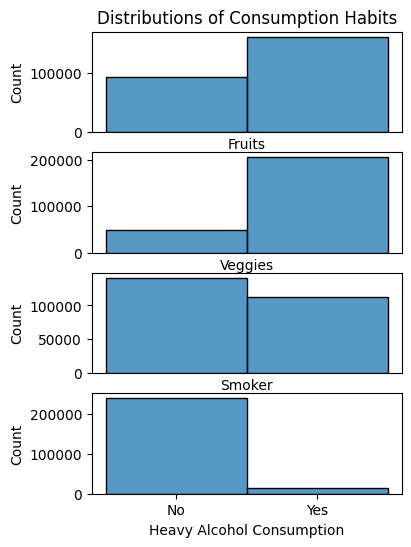

In [87]:
## Figure for distributions of variables related to consumption
# Prepare a separate data frame for generating a subplot figure
bin_consump = bin_df[['Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']].replace({0: 'No', 1: 'Yes'}).copy()
bin_consump['Fruits'] = pd.Categorical(bin_consump['Fruits'], ['No', 'Yes'])
bin_consump['Veggies'] = pd.Categorical(bin_consump['Veggies'], ['No', 'Yes'])
bin_consump['Smoker'] = pd.Categorical(bin_consump['Smoker'], ['No', 'Yes'])
bin_consump['HvyAlcoholConsump'] = pd.Categorical(bin_consump['HvyAlcoholConsump'], ['No', 'Yes'])

# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(4,6))
sns.histplot(data = bin_consump, x = 'Fruits', ax = axes[0])
sns.histplot(data = bin_consump, x = 'Veggies', ax = axes[1])
sns.histplot(data = bin_consump, x = 'Smoker', ax = axes[2])
sns.histplot(data = bin_consump, x = 'HvyAlcoholConsump', ax = axes[3])
axes[0].set(xlabel='Fruits', xticklabels = [], xticks = [], title = 'Distributions of Consumption Habits')
axes[1].set(xlabel='Veggies', xticklabels = [], xticks = [])
axes[2].set(xlabel='Smoker', xticklabels = [], xticks = [])
axes[3].set(xlabel='Heavy Alcohol Consumption')

[Text(0.5, 0, 'HighChol')]

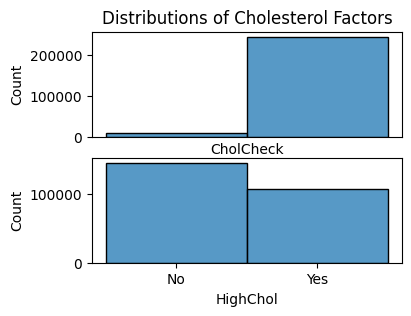

In [88]:
## Figure for distributions of variables related to cholesterol
# Prepare a separate data frame for generating a subplot figure
bin_chol = bin_df[['CholCheck', 'HighChol']].replace({0: 'No', 1: 'Yes'}).copy()
bin_chol['CholCheck'] = pd.Categorical(bin_chol['CholCheck'], ['No', 'Yes'])
bin_chol['HighChol'] = pd.Categorical(bin_chol['HighChol'], ['No', 'Yes'])

# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(4,3))
sns.histplot(data = bin_chol, x = 'CholCheck', ax = axes[0])
sns.histplot(data = bin_chol, x = 'HighChol', ax = axes[1])
axes[0].set(xlabel='CholCheck', xticklabels = [], xticks = [], title = 'Distributions of Cholesterol Factors')
axes[1].set(xlabel='HighChol')

[Text(0.5, 0, 'PhysActivity')]

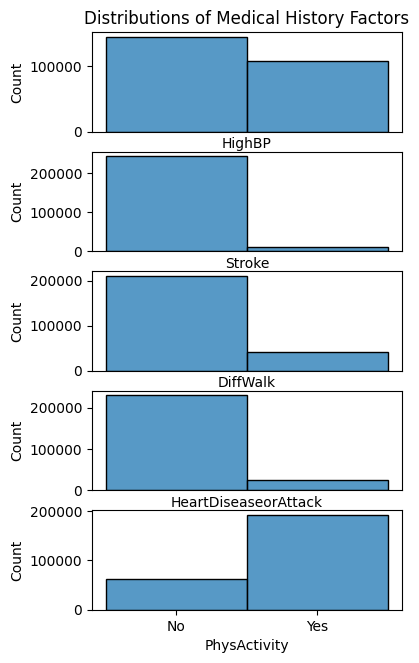

In [89]:
## Figure for distributions of variables related to medical history
# Prepare a separate data frame for generating a subplot figure
bin_history = bin_df[['HighBP', 'Stroke', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysActivity']].replace({0: 'No', 1: 'Yes'}).copy()
bin_history['HighBP'] = pd.Categorical(bin_history['HighBP'], ['No', 'Yes'])
bin_history['Stroke'] = pd.Categorical(bin_history['Stroke'], ['No', 'Yes'])
bin_history['DiffWalk'] = pd.Categorical(bin_history['DiffWalk'], ['No', 'Yes'])
bin_history['HeartDiseaseorAttack'] = pd.Categorical(bin_history['HeartDiseaseorAttack'], ['No', 'Yes'])
bin_history['PhysActivity'] = pd.Categorical(bin_history['PhysActivity'], ['No', 'Yes'])

# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(4, 7.5))
sns.histplot(data = bin_history, x = 'HighBP', ax = axes[0])
sns.histplot(data = bin_history, x = 'Stroke', ax = axes[1])
sns.histplot(data = bin_history, x = 'DiffWalk', ax = axes[2])
sns.histplot(data = bin_history, x = 'HeartDiseaseorAttack', ax = axes[3])
sns.histplot(data = bin_history, x = 'PhysActivity', ax = axes[4])
axes[0].set(xlabel='HighBP', xticklabels = [], xticks = [], title = 'Distributions of Medical History Factors')
axes[1].set(xlabel='Stroke', xticklabels = [], xticks = [])
axes[2].set(xlabel='DiffWalk', xticklabels = [], xticks = [])
axes[3].set(xlabel='HeartDiseaseorAttack', xticklabels = [], xticks = [])
axes[4].set(xlabel='PhysActivity')

[Text(0.5, 0, 'NoDocbcCost')]

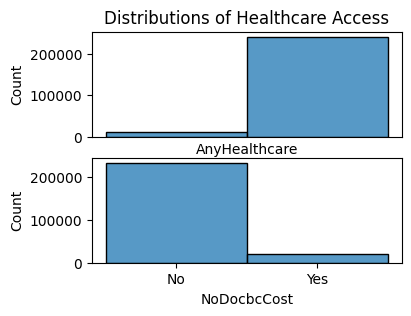

In [90]:
## Figure for distributions of variables related to healthcare access
# Prepare a separate data frame for generating a subplot figure
bin_health = bin_df[['AnyHealthcare', 'NoDocbcCost']].replace({0: 'No', 1: 'Yes'}).copy()
bin_health.head(10)
bin_health['AnyHealthcare'] = pd.Categorical(bin_health['AnyHealthcare'], ['No', 'Yes'])
bin_health['NoDocbcCost'] = pd.Categorical(bin_health['NoDocbcCost'], ['No', 'Yes'])

# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(4,3))
sns.histplot(data = bin_health, x = 'AnyHealthcare', ax = axes[0])
sns.histplot(data = bin_health, x = 'NoDocbcCost', ax = axes[1])
axes[0].set(xlabel='AnyHealthcare', xticklabels = [], xticks = [], title = 'Distributions of Healthcare Access')
axes[1].set(xlabel='NoDocbcCost')

[Text(0.5, 0, 'BMI')]

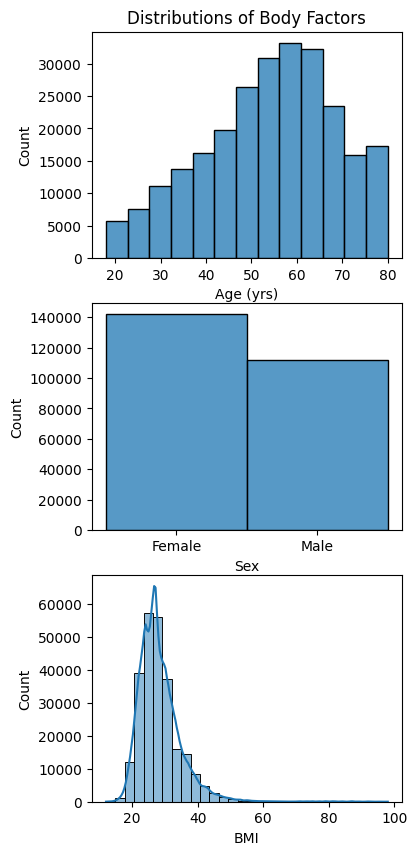

In [91]:
## Figure for distributions of variables related to body factors
# Prepare the separate data frame for generating the subplot figure
bin_body = bin_df[['Age', 'Sex', 'BMI']].copy()
bin_body['Age'].replace({1: 18, 2: 25, 3: 30, 4: 35, 5: 40, 6: 45, 7: 50, 
                         8: 55, 9: 60, 10: 65, 11: 70, 12: 75, 13: 80}, inplace = True)
bin_body['Sex'].replace({0: 'Female', 1: 'Male'}, inplace = True)

# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(4,10))
sns.histplot(data = bin_body, x = 'Age', bins = 13, ax = axes[0])
sns.histplot(data = bin_body, x = 'Sex', bins = 2, ax = axes[1])
sns.histplot(data = bin_body, x = 'BMI', bins = 30, ax = axes[2], kde = True)
axes[0].set(xlabel='Age (yrs)', title = 'Distributions of Body Factors')
axes[1].set(xlabel='Sex')
axes[2].set(xlabel='BMI')

[[<matplotlib.axis.XTick at 0x302297110>,
 Text(0.5, 0, 'General Health Evaluation'),
 Text(0.5, 1.0, 'Distributions of Health Measures')]

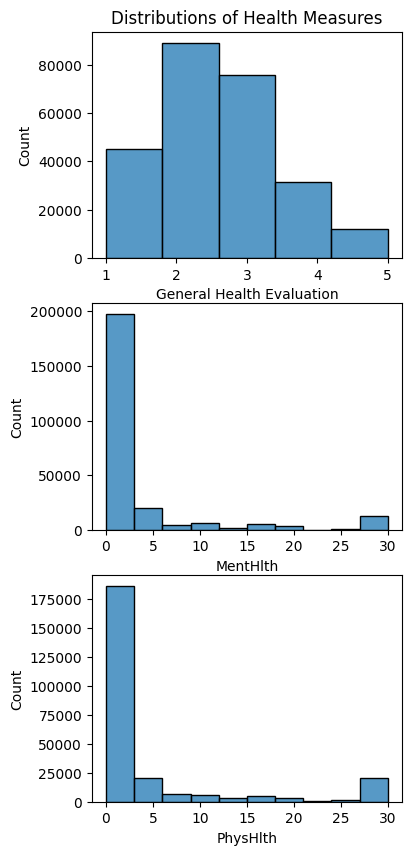

In [92]:
## Figure for distributions of variables of health measures
# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(4,10))
sns.histplot(data = bin_df, x = 'GenHlth', bins = 5, ax = axes[0])
sns.histplot(data = bin_df, x = 'MentHlth', bins = 10, ax = axes[1])
sns.histplot(data = bin_df, x = 'PhysHlth', bins = 10, ax = axes[2])
axes[0].set(xticks = [1, 2, 3, 4, 5], xlabel = 'General Health Evaluation', title = 'Distributions of Health Measures')

[Text(0.5, 0, 'Education (Yrs spent studying)'),
 Text(0.5, 1.0, 'Distribution of Socio-Economic Factors')]

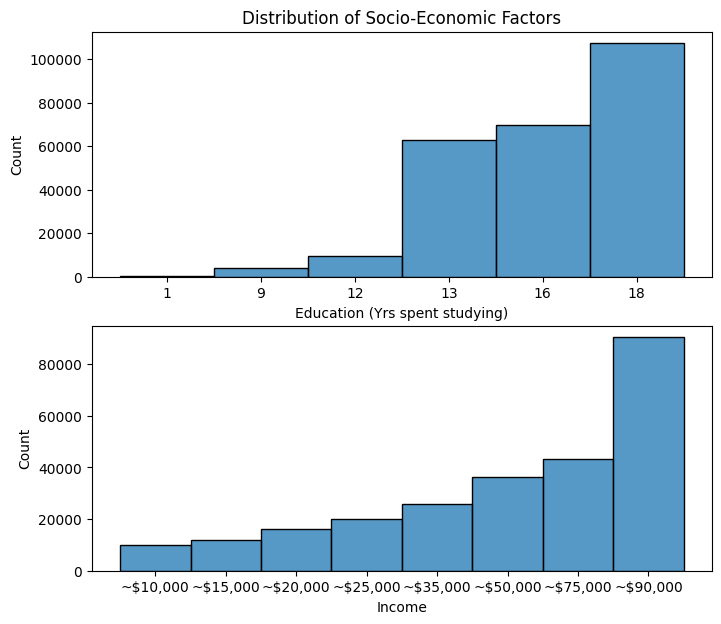

In [93]:
## Figure for distributions of variables related to socioeconomic factors
# Prepare the separate data frame for generating the subplot figure
bin_socec = bin_df[['Education', 'Income']]
bin_socec['Education'].replace({1: '1', 2: '9', 3: '12', 4: '13', 5: '16', 6: '18'}, inplace = True)
bin_socec['Education'] = pd.Categorical(bin_socec['Education'], ['1','9','12','13','16','18'])
bin_socec['Income'].replace({1: '~$10,000', 2: '~$15,000', 3: '~$20,000', 4: '~$25,000', 5: '~$35,000', 6: '~$50,000', 7: '~$75,000', 8: '~$90,000'}, inplace = True)
bin_socec['Income'] = pd.Categorical(bin_socec['Income'], ['~$10,000','~$15,000','~$20,000','~$25,000','~$35,000','~$50,000','~$75,000','~$90,000'])

# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,7))
sns.histplot(data = bin_socec, x = 'Education', ax = axes[0])
sns.histplot(data = bin_socec, x = 'Income', ax = axes[1])
axes[0].set(xlabel = 'Education (Yrs spent studying)', title = 'Distribution of Socio-Economic Factors')

## Compare datasets
Need to determine whether both should be analyzed or if we should focus on one in particular

Text(0.5, 1.0, 'Correlation Matrix: Binary Classification Targets')

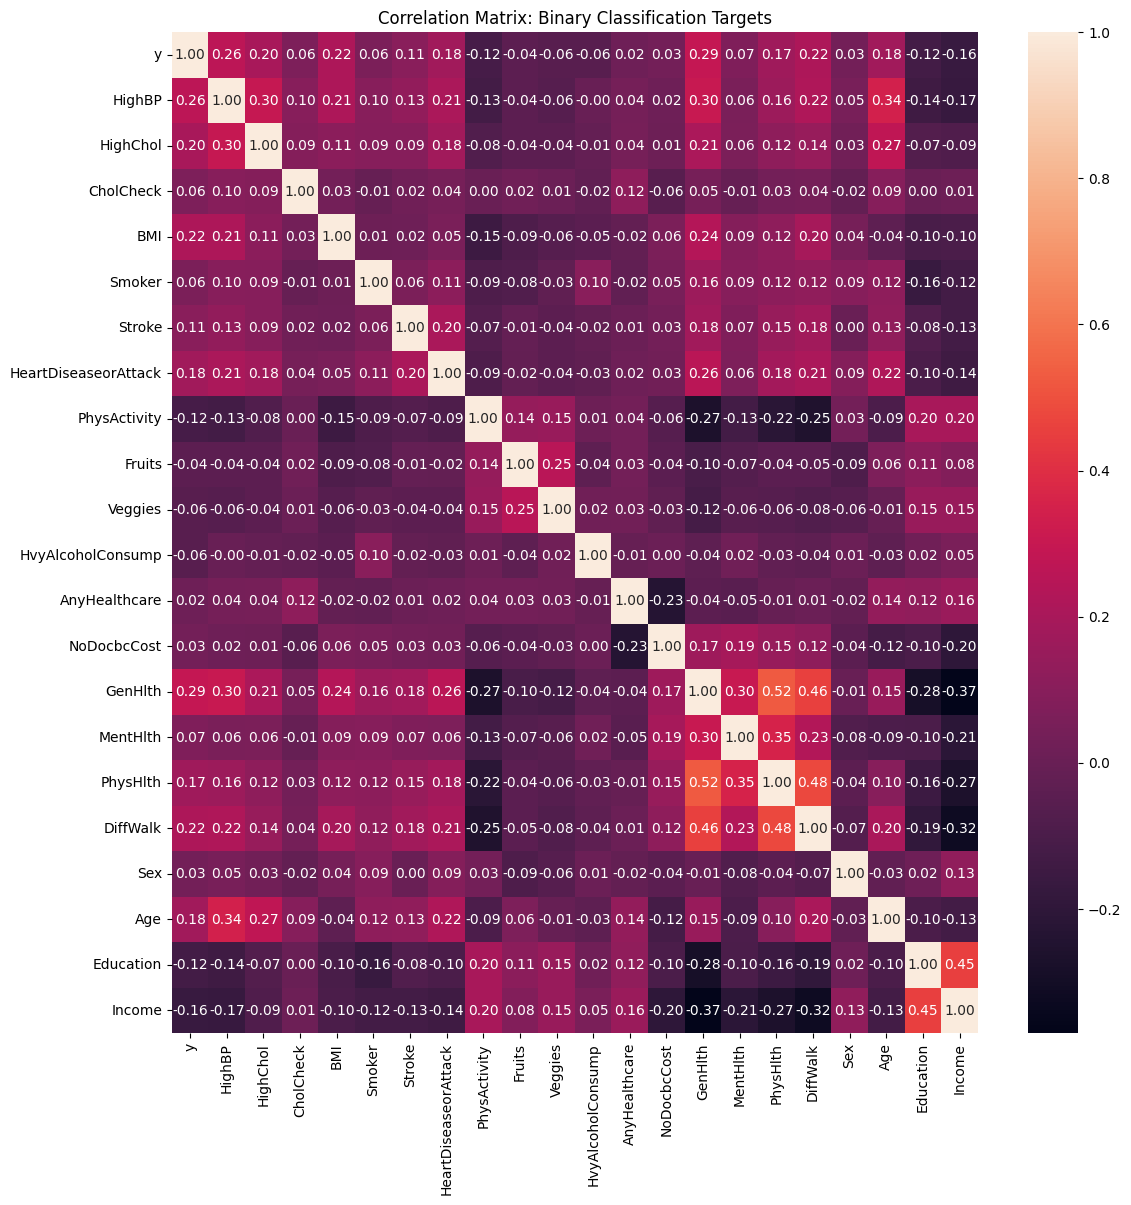

In [94]:
# Correlation matrix for 2-classification targets (healthy, diabetic)
plt.figure(figsize = (13, 13))
sns.heatmap(bin_df.corr(), annot = True, fmt = '.2f')
plt.title('Correlation Matrix: Binary Classification Targets')

Text(0.5, 1.0, 'Correlation Matrix: 3-Classification Targets')

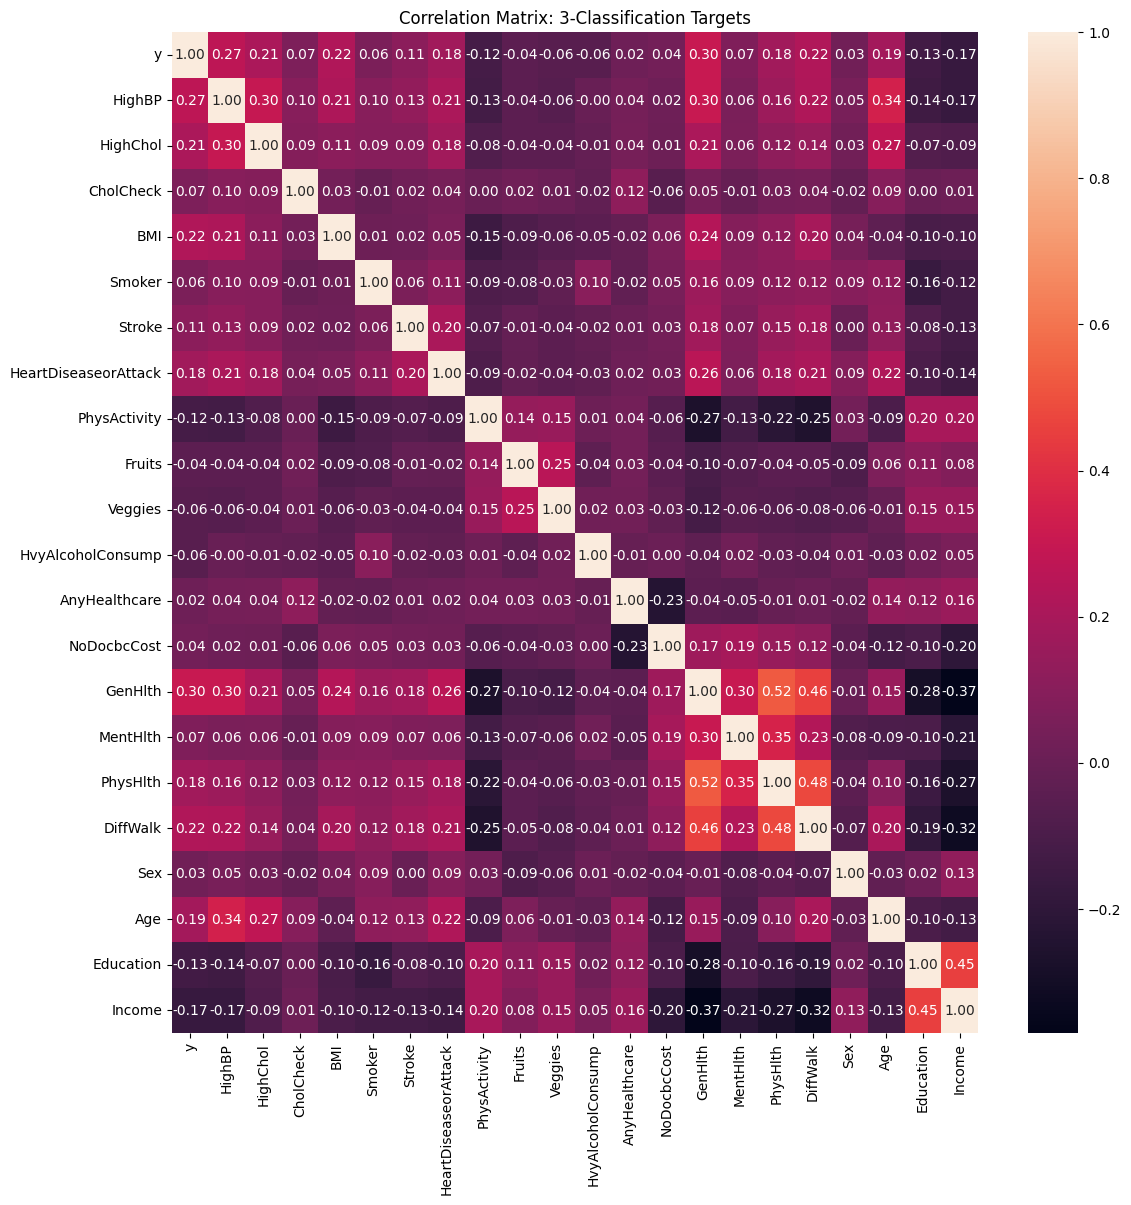

In [95]:
# Correlation matrix for 3-classification targets (healthy, pre-diabetic, diabetic)
plt.figure(figsize = (13, 13))
sns.heatmap(tri_df.corr(), annot = True, fmt = '.2f')
plt.title('Correlation Matrix: 3-Classification Targets')

Text(0.5, 0.98, 'BMI by Target Outcome')

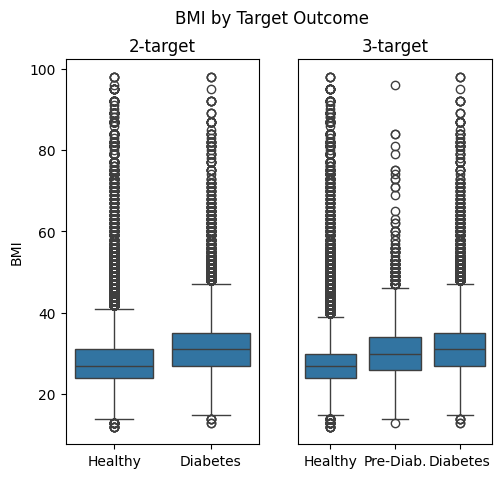

In [96]:
## Figure for boxplots of BMI values related to each of the two datasets
# Prepare the separate data frame for generating the subplot figure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(5.5,5))
sns.boxplot(x = bin_target, y = bin_df['BMI'], ax = axes[0])
sns.boxplot(x = tri_target, y = tri_df['BMI'], ax = axes[1])
axes[0].set(title = '2-target')
axes[1].set(title = '3-target', ylabel = None, yticks = [], yticklabels = [])
plt.suptitle('BMI by Target Outcome')

[Text(0.5, 0, '3-target')]

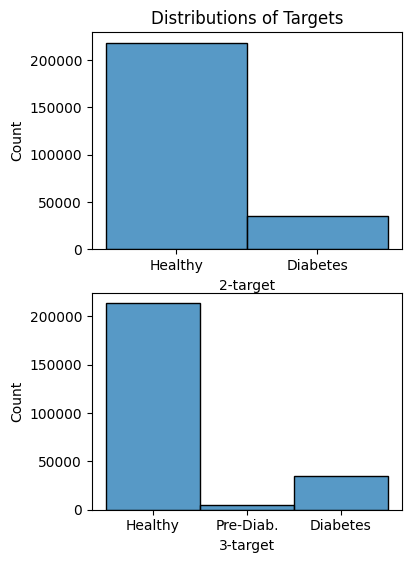

In [97]:
## Figure for distributions of target variables for each of the two datasets
# Prepare the separate data frame for generating the subplot figure
bin_target = bin_df['y'].copy()
bin_target.replace({0: 'Healthy', 1: 'Diabetes'}, inplace = True)
bin_target = pd.Categorical(bin_target, ['Healthy', 'Diabetes'])
tri_target = tri_df['y'].copy()
tri_target.replace({0: 'Healthy', 1: 'Pre-Diab.', 2: 'Diabetes'}, inplace = True)
tri_target = pd.Categorical(tri_target, ['Healthy', 'Pre-Diab.', 'Diabetes'])

# Generate subplot figure
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(4,6.2))
sns.histplot(bin_target, bins = 2, ax = axes[0])
sns.histplot(tri_target, bins = 3, ax = axes[1])
axes[0].set(xlabel = '2-target', title = 'Distributions of Targets')
axes[1].set(xlabel = '3-target')

## Data Cleaning
- Simple steps are taken to decode numerical category variables into values that represent the categorical groups (since not all classes are linearly distributed, this could change the classifier's performance)
- The first education class is eliminated due to an extremely small amount of samples
- Feature engineering is the final project goal, so the process of evaluating the influence of individual factors is excluded from the initial report
- As a result, although there are many classes that are unbalanced across all factors, elimination of a factor will be tested thoroughly in the coming steps, and we have included all factors in the intial testing phases that follow
- The 3-target dataset has an absurdly small amount of samples for the pre-diabetic class, which also decreases the samples for the diabetic class. As a result, we will focus on the 2-target dataset

In [98]:
# Clean dataframe with final steps
bin_df['Education'].drop(1, axis = 0, inplace = True)
bin_df['Education'].replace({2: '9', 3: '12', 4: '13', 5: '16', 6: '18'}, inplace = True)
bin_df['Income'].replace({1: 10000, 2: 15000, 3: 20000, 4: 25000, 5: 35000, 6: 50000, 7: 75000, 8: 90000}, inplace = True)
bin_df['Age'].replace({1: 18, 2: 25, 3: 30, 4: 35, 5: 40, 6: 45, 7: 50, 
                         8: 55, 9: 60, 10: 65, 11: 70, 12: 75, 13: 80}, inplace = True)


## Baseline Model Testing

In [99]:
# Separate entire dataset
X_train, X_test, y_train, y_test = train_test_split(bin_df.drop('y', axis = 1), bin_df['y'], test_size = 0.3)

# Separate dataset for health baseline model
health_X_train, health_X_test, health_y_train, health_y_test = train_test_split(bin_df[['GenHlth','MentHlth','PhysHlth']], bin_df['y'], test_size = 0.3)

# Separate dataset for body baseline model
body_X_train, body_X_test, body_y_train, body_y_test = train_test_split(bin_df[['BMI','Sex','Age']], bin_df['y'], test_size = 0.3)

In [100]:
# Fit dummy model and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
dummy_clf = DummyClassifier().fit(X_train, y_train)
dummy_fit_time = (time.time() - start_time)
baseline_train_score = dummy_clf.score(X_train, y_train)
baseline_test_score = dummy_clf.score(X_test, y_test)

# Fit health model and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
health_tree = DecisionTreeClassifier().fit(health_X_train, health_y_train)
health_fit_time = (time.time() - start_time)
health_tree_train_score = health_tree.score(health_X_train, health_y_train)
health_tree_test_score = health_tree.score(health_X_test, health_y_test)

# Fit body model and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
body_tree = DecisionTreeClassifier().fit(body_X_train, body_y_train)
body_fit_time = (time.time() - start_time)
body_tree_train_score = body_tree.score(body_X_train, body_y_train)
body_tree_test_score = body_tree.score(body_X_test, body_y_test)

In [101]:
# Make baseline results dataframe for visualization as a table. Includes training score, testing score, and fit time
baseline_results = pd.DataFrame({'Baseline-Dummy': [baseline_train_score, baseline_test_score, dummy_fit_time],
                        'Baseline-Health': [health_tree_train_score, health_tree_test_score, health_fit_time],
                        'Baseline-Body': [body_tree_train_score, body_tree_test_score, body_fit_time]})
baseline_results.rename({0: 'train score', 1: 'test score', 2: 'fit time (s)'}, axis = 0, inplace = True)
baseline_results.head()

,Baseline-Dummy,Baseline-Health,Baseline-Body
train score,0.860617,0.861856,0.862341
test score,0.860783,0.859994,0.860257
fit time (s),0.006138,0.043869,0.064830


## Initial Classification Model Testing

In [102]:
# Fit decision tree classifier and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_fit_time = (time.time() - start_time)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)

# Fit support vector machine classifier and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
svm = SVC().fit(X_train, y_train)
svm_fit_time = (time.time() - start_time)
svm_train_score = svm.score(X_train, y_train)
svm_test_score = svm.score(X_test, y_test)

# Fit K nearest neighbors classifier and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_fit_time = (time.time() - start_time)
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

In [103]:
# Make initial classification results dataframe for visualization as a table
classification_results = pd.DataFrame({'Decision-Tree': [tree_train_score, tree_test_score, tree_fit_time],
                        'SVM': [svm_train_score, svm_test_score, svm_fit_time],
                        'KNN': [knn_train_score, knn_test_score, knn_fit_time]})
classification_results.rename({0: 'train score', 1: 'test score', 2: 'fit time (s)'}, axis = 0, inplace = True)
classification_results.head()

,Decision-Tree,SVM,KNN
train score,0.994752,0.860617,0.883306
test score,0.797264,0.860783,0.845133
fit time (s),0.603214,626.735842,0.143742


In [104]:
simple_split_df = pd.DataFrame({'Baseline-Dummy': [baseline_train_score, baseline_test_score, dummy_fit_time],
                        'Baseline-Health': [health_tree_train_score, health_tree_test_score, health_fit_time],
                        'Baseline-Body': [body_tree_train_score, body_tree_test_score, body_fit_time],
                        'Decision-Tree': [tree_train_score, tree_test_score, tree_fit_time],
                        'SVM': [svm_train_score, svm_test_score, svm_fit_time],
                        'KNN': [knn_train_score, knn_test_score, knn_fit_time]})
simple_split_df.rename({0: 'train score', 1: 'test score', 2: 'fit time (s)'}, axis = 0, inplace = True)
simple_split_df.head()

,Baseline-Dummy,Baseline-Health,Baseline-Body,Decision-Tree,SVM,KNN
train score,0.860617,0.861856,0.862341,0.994752,0.860617,0.883306
test score,0.860783,0.859994,0.860257,0.797264,0.860783,0.845133
fit time (s),0.006138,0.043869,0.064830,0.603214,626.735842,0.143742


## Testing balanced separation of binary targets

In [105]:
## Prepare data splits for full dataset used in dummy baseline model and classification model testing
# Separate no diabetes and diabetes targets
none_df = bin_df.loc[bin_df['y'] == 0]
diab_df = bin_df.loc[bin_df['y'] == 1]

# Split into training and test sets for outcomes separately
none_X_train, none_X_test, none_y_train, none_y_test = train_test_split(none_df.drop('y', axis = 1), none_df['y'], test_size = 0.3, random_state = 42)
diab_X_train, diab_X_test, diab_y_train, diab_y_test = train_test_split(diab_df.drop('y', axis = 1), diab_df['y'], test_size = 0.3, random_state = 42)

# Group training and test sets, with a random shuffle
X_train = pd.concat([none_X_train, diab_X_train], axis = 0).sample(frac = 1, random_state = 42)
X_test = pd.concat([none_X_test, diab_X_test], axis = 0).sample(frac = 1, random_state = 42)
y_train = pd.concat([none_y_train, diab_y_train], axis = 0).sample(frac = 1, random_state = 42)
y_test = pd.concat([none_y_test, diab_y_test], axis = 0).sample(frac = 1, random_state = 42)

In [106]:
## Prepare data splits for health dataset used in health baseline model
# Separate no diabetes and diabetes targets
none_df = bin_df.loc[bin_df['y'] == 0]
diab_df = bin_df.loc[bin_df['y'] == 1]

# Split into training and test sets for outcomes separately
none_health_X_train, none_health_X_test, none_health_y_train, none_health_y_test = train_test_split(none_df[['GenHlth','MentHlth','PhysHlth']], none_df['y'], test_size = 0.3, random_state = 42)
diab_health_X_train, diab_health_X_test, diab_health_y_train, diab_health_y_test = train_test_split(diab_df[['GenHlth','MentHlth','PhysHlth']], diab_df['y'], test_size = 0.3, random_state = 42)

# Group training and test sets, with a random shuffle
health_X_train = pd.concat([none_health_X_train, diab_health_X_train], axis = 0).sample(frac = 1, random_state = 42)
health_X_test = pd.concat([none_health_X_test, diab_health_X_test], axis = 0).sample(frac = 1, random_state = 42)
health_y_train = pd.concat([none_health_y_train, diab_health_y_train], axis = 0).sample(frac = 1, random_state = 42)
health_y_test = pd.concat([none_health_y_test, diab_health_y_test], axis = 0).sample(frac = 1, random_state = 42)

In [107]:
## Prepare data splits for body dataset used in body baseline model
# Separate no diabetes and diabetes targets
none_df = bin_df.loc[bin_df['y'] == 0]
diab_df = bin_df.loc[bin_df['y'] == 1]

# Split into training and test sets for outcomes separately
none_body_X_train, none_body_X_test, none_body_y_train, none_body_y_test = train_test_split(none_df[['BMI','Sex','Age']], none_df['y'], test_size = 0.3, random_state = 42)
diab_body_X_train, diab_body_X_test, diab_body_y_train, diab_body_y_test = train_test_split(diab_df[['BMI','Sex','Age']], diab_df['y'], test_size = 0.3, random_state = 42)

# Group training and test sets, with a random shuffle
body_X_train = pd.concat([none_body_X_train, diab_body_X_train], axis = 0).sample(frac = 1, random_state = 42)
body_X_test = pd.concat([none_body_X_test, diab_body_X_test], axis = 0).sample(frac = 1, random_state = 42)
body_y_train = pd.concat([none_body_y_train, diab_body_y_train], axis = 0).sample(frac = 1, random_state = 42)
body_y_test = pd.concat([none_body_y_test, diab_body_y_test], axis = 0).sample(frac = 1, random_state = 42)

In [108]:
# Fit dummy model and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
dummy_clf = DummyClassifier().fit(X_train, y_train)
dummy_fit_time = (time.time() - start_time)
baseline_train_score = dummy_clf.score(X_train, y_train)
baseline_test_score = dummy_clf.score(X_test, y_test)

# Fit health model and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
health_tree = DecisionTreeClassifier().fit(health_X_train, health_y_train)
health_fit_time = (time.time() - start_time)
health_tree_train_score = health_tree.score(health_X_train, health_y_train)
health_tree_test_score = health_tree.score(health_X_test, health_y_test)

# Fit body model and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
body_tree = DecisionTreeClassifier().fit(body_X_train, body_y_train)
body_fit_time = (time.time() - start_time)
body_tree_train_score = body_tree.score(body_X_train, body_y_train)
body_tree_test_score = body_tree.score(body_X_test, body_y_test)

In [109]:
# Fit decision tree classifier and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_fit_time = (time.time() - start_time)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)

# Fit support vector machine classifier and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
svm = SVC().fit(X_train, y_train)
svm_fit_time = (time.time() - start_time)
svm_train_score = svm.score(X_train, y_train)
svm_test_score = svm.score(X_test, y_test)

# Fit k nearest neighbors classifier and calculate mean accuracy scores for the training and test datasets
start_time = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_fit_time = (time.time() - start_time)
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

In [110]:
# Make classification results dataframe for an even distribution of target outcomes
balanced_classification_results = pd.DataFrame({'Baseline-Dummy': [baseline_train_score, baseline_test_score, dummy_fit_time],
                        'Baseline-Health': [health_tree_train_score, health_tree_test_score, health_fit_time],
                        'Baseline-Body': [body_tree_train_score, body_tree_test_score, body_fit_time],
                        'Decision-Tree': [tree_train_score, tree_test_score, tree_fit_time],
                        'SVM': [svm_train_score, svm_test_score, svm_fit_time],
                        'KNN': [knn_train_score, knn_test_score, knn_fit_time]})
balanced_classification_results.rename({0: 'train score', 1: 'test score', 2: 'fit time (s)'}, axis = 0, inplace = True)
balanced_classification_results.head()

,Baseline-Dummy,Baseline-Health,Baseline-Body,Decision-Tree,SVM,KNN
train score,0.860667,0.862255,0.862514,0.994768,0.860667,0.883520
test score,0.860666,0.859392,0.860062,0.793010,0.860666,0.845542
fit time (s),0.005459,0.044889,0.067350,0.612786,307.140345,0.144985


In [111]:
simple_split_df.head()

,Baseline-Dummy,Baseline-Health,Baseline-Body,Decision-Tree,SVM,KNN
train score,0.860617,0.861856,0.862341,0.994752,0.860617,0.883306
test score,0.860783,0.859994,0.860257,0.797264,0.860783,0.845133
fit time (s),0.006138,0.043869,0.064830,0.603214,626.735842,0.143742


### Evaluation
- Mean accuracy score is the main evaluation metric that will be used
- As a reflection of a model's overall "correctness", this metric is useful since we have a clear target variable
- 3 baseline models are used for comparison purposes: dummy model, health model, and body model
- The separate baseline models allow us to get an initial idea of the influence that certain factors have on the efficacy of the classification models
- The unbalanced target class could pose an issue when separating training and testing datasets, so we will test two different splitting methods

### Conclusions
- The different splitting methods lead to comparable results
- The dataset is massive, evidenced by the enormous difference in processing times
- The support vector machine is the classifier with the best results, with the greatest consistency between training and testing data sets, and also with an overwhelmingly large processing time.